# Real-Time Kinematic Analysis from Oculus Quest

## Description

Scripts to validate data collection from XR applications for Oculus Quest developed in Unity 2019.1

## Dev

Requires package `pyxdf` to load the XDF files recorded using LabRecorder from LSL library.

### Objective

Exploratory Data Analysis of data streamed from Oculus Quest including rotations and positions of HMD and controllers.


In [1]:
from pathlib import Path
import sys,os
this_path = str(Path().absolute())+"/"
print("File Path:", this_path)
# sys.path.append(os.path.join(Path().absolute(), "src"))

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex'] = True
%matplotlib inline

# Load XDF
import os
import logging
import pyxdf

File Path: d:\Ludwig\Empresas\GIT-repos\data-capture-vr\PythonAnalysis/


## Functions

In [2]:
def load_xdf_file(filename):
    # logging.basicConfig(level=logging.DEBUG)  # Use logging.INFO to reduce output.
    fname = os.path.abspath(os.path.join(os.path.abspath('')))
    fname = fname + filename
    streams, fileheader = pyxdf.load_xdf(fname)
    print("Found {} streams:".format(len(streams)))
    for ix, stream in enumerate(streams):
        print("Stream {}: {} - type {} - uid {} - shape {} at {} Hz (effective {} Hz)".format(
            ix + 1, stream['info']['name'][0],
            stream['info']['type'][0],
            stream['info']['uid'][0],
            (int(stream['info']['channel_count'][0]), len(stream['time_stamps'])),
            stream['info']['nominal_srate'][0],
            stream['info']['effective_srate'])
        )
        if any(stream['time_stamps']):
            print("\tDuration: {} s".format(stream['time_stamps'][-1] - stream['time_stamps'][0]))
    print("Done.")
    return streams, fileheader

In [3]:
def plot_1D_df(data, colname, scale = 1, title = "Example of ECG signal from Polar H10", xlabel = 'Sample index', ylabel = 'ECG Signal ($mV$)', suffix = "", imgFormat='pdf', numSamplesData = 0, save = False, filename = "img", savePath = "./"):
    data = data[colname]
    # Plot 1D
    fig = plt.figure(figsize=(15,10))
    if(numSamplesData == 0):
        plt.plot(data * scale, 'r')
    else:
        plt.plot(data[0:numSamplesData] * scale, 'r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    if(numSamplesData != 0):
        suffix += "_" + str(numSamplesData)
    if (save):
        fig.savefig(path.joinpath(savePath,filename.split(".")[0]+suffix+'.'+imgFormat))

In [4]:
def plot_1D_filename(filename, colname, scale = 1, title = "Example of ECG signal from Polar H10", xlabel = 'Sample index', ylabel = 'ECG Signal ($mV$)', suffix = "", imgFormat='pdf', numSamplesData = 0, save = True, savePath = "./"):
    data = pd.read_csv(path.joinpath(path.parent,path.name), sep=",")
    plot_1D_df(data,colname, scale, title, xlabel, ylabel, suffix, imgFormat, numSamplesData, save, filename, savePath)

## Load files and create plots

In [6]:
folder_path = './data/'
# LabRecorderLogs
filename_xdf = 'OCULUS_QUEST_STREAMING.xdf'
timeseries_colname = 'time_series'
timestamp_colname = 'time_stamps'

In [7]:
streams, fileheader = load_xdf_file(folder_path+filename_xdf)

Found 3 streams:
Stream 1: HMD - type DAMI_DSV_SU - uid d275074d-579b-4806-989f-f76abe69187f - shape (10, 2656) at 0.000000 Hz (effective 0 Hz)
	Duration: 37.49626886553597 s
Stream 2: RightController - type DAMI_DSV_SU - uid 1a07bc67-51a5-4639-82bc-b47c99e0509f - shape (10, 2656) at 0.000000 Hz (effective 0 Hz)
	Duration: 37.496197239495814 s
Stream 3: LeftController - type DAMI_DSV_SU - uid 28681a6b-a5c1-4cc3-9e46-dd2edfa88e99 - shape (10, 2656) at 0.000000 Hz (effective 0 Hz)
	Duration: 37.49651032453403 s
Done.


In [8]:
# In which index is each signal
# Modify with the column name to put in the dataframe, and the order in which it appears in the previous variable `streams`
iterator_signals = {
    "HMD": 0,
    "RightController": 1,
    "LeftController": 2,
}

In [11]:
data = {
    "XDF": {

    },
    # Used to record data from unity logger
    "CUSTOM": {

    }
}

In [30]:
signals = {
    "timestamps": [],
    "rotationQuaternion": [],
    "rotationEuler": [],
    "position": []
}

d:\Ludwig\Empresas\GIT-repos\data-capture-vr\PythonAnalysis\data\OCULUS_QUEST_STREAMING.xdf HMD
d:\Ludwig\Empresas\GIT-repos\data-capture-vr\PythonAnalysis\data\OCULUS_QUEST_STREAMING.xdf RightController
d:\Ludwig\Empresas\GIT-repos\data-capture-vr\PythonAnalysis\data\OCULUS_QUEST_STREAMING.xdf LeftController


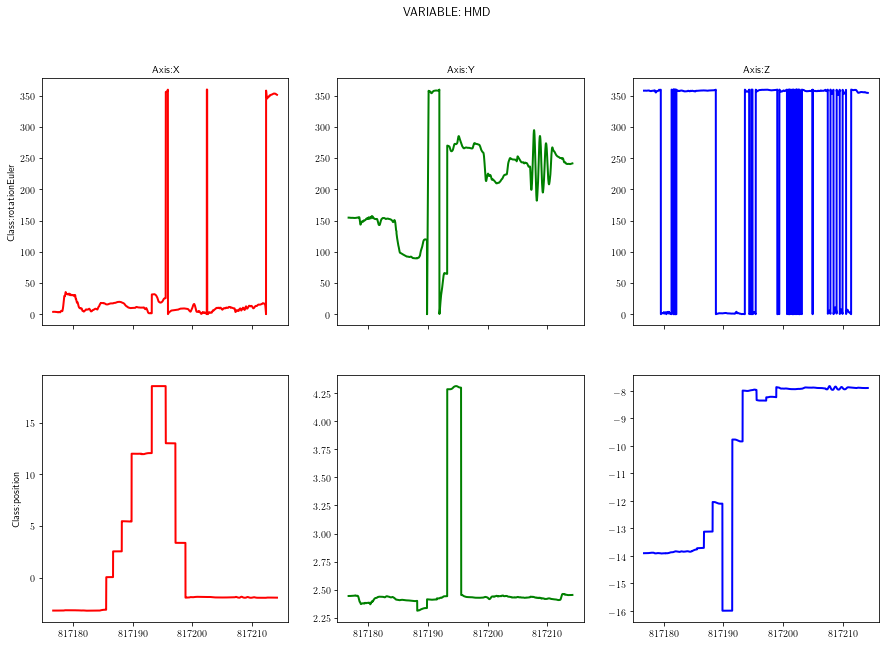

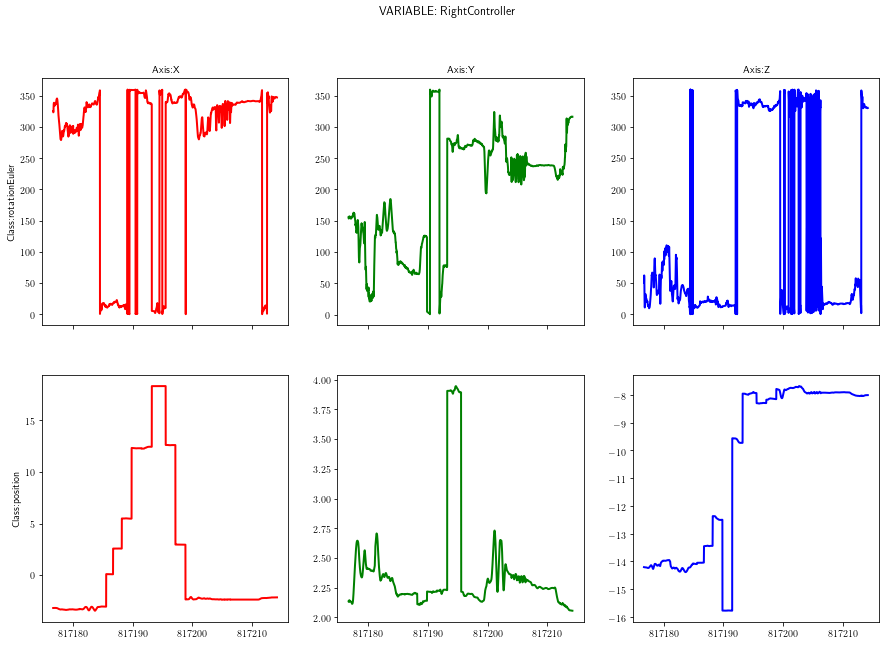

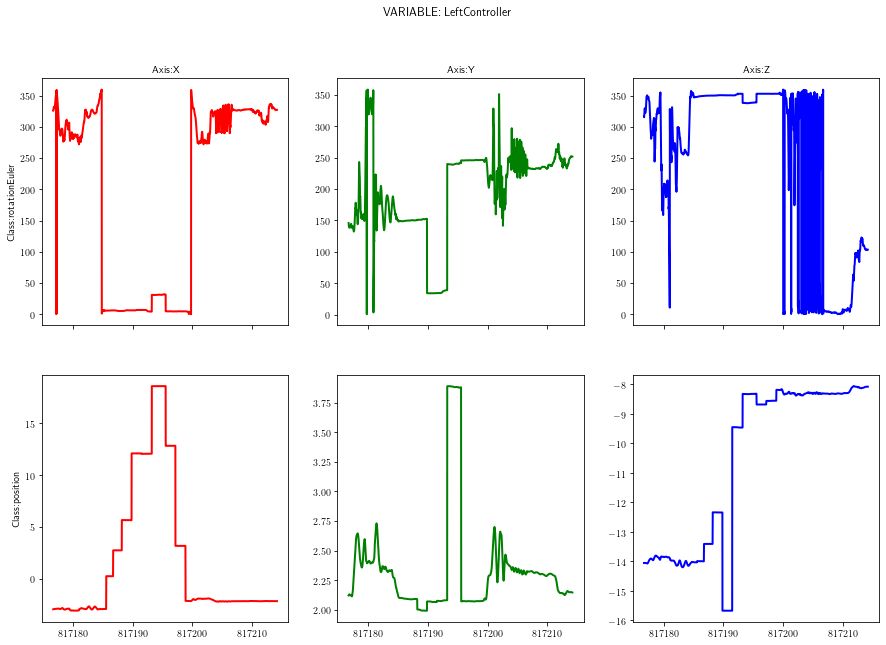

In [44]:
for k,v in iterator_signals.items():
    colname = k

    signals["timestamps"] = pd.DataFrame(data=streams[v][timestamp_colname], columns=['timestamp'])

    signals["rotationQuaternion"] = pd.DataFrame(data=streams[v][timeseries_colname][:,0:4], columns=["X", "Y", "Z", "W"])
    signals["rotationEuler"] = pd.DataFrame(data=streams[v][timeseries_colname][:,4:7], columns=["X", "Y", "Z"])
    signals["position"] = pd.DataFrame(data=streams[v][timeseries_colname][:,7:], columns=["X", "Y", "Z"])
    #ts = ts - ts.values[0]  # Convert to seconds starting in zero

    # Combine both dataframes in one
    data["XDF"] = signals;

    path = Path(this_path + folder_path + filename_xdf)
    print(path.joinpath(path.parent,path.name), str(colname))

    # Plot
    colors = ['r','g','b']
    classes = ["rotationEuler", "position"]
    num_classes = len(classes)
    axes_labels = ["X", "Y", "Z"]
    num_axes = len(axes_labels)
    fig, axes = plt.subplots(num_classes, num_axes, sharex=True, figsize=(15,10))

    for i in range(num_classes):
        for j in range(num_axes):
            t_class = classes[i]
            t_axis = axes_labels[j]

            axes[i, j].plot(data["XDF"]["timestamps"], data["XDF"][t_class][t_axis], colors[j], linewidth=2)
            # axes[i, j].fill_between(mean_ts.index, low_line, high_line, color=colors[j], alpha=0.2)

            # Set column labels
            if(i == 0):
                axes[i,j].set_title(str('Axis:' + t_axis), fontsize=10)
            # Set row labels
            if(j == 0):
                axes[i,j].set_ylabel(str('Class:' + str(t_class)))

    plt.suptitle("VARIABLE: " + colname)
    #fig.tight_layout()